# Decision Trees: Penguins
___

**Dataset**: Penguins



In [1]:
# TODO: Add the tree visualizer
# TODO: Plot decision boundaries?
# TODO: K-fold cross-validation (or other validation)
# TODO: Other metrics?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from em_el.utils import draw_confusion_matrix

In [3]:
penguins = sns.load_dataset('penguins').dropna()
le = LabelEncoder()
penguins['sex'] = le.fit_transform(penguins['sex'])
# penguins['species'] = le.fit_transform(penguins['species'])
penguins['island'] = le.fit_transform(penguins['island'])

X = penguins.drop('species', axis=1)  # We do not want the species (label) column in our training data
y = penguins['species']

# Here we split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
decision_tree = DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, random_state=42)  # Initialize the classifier
decision_tree.fit(X_train, y_train)  # Train
print("Classes: ", decision_tree.classes_)  # Observe the classes

Classes:  ['Adelie' 'Chinstrap' 'Gentoo']


In [5]:
# Text Representation of Tree
print("Tree: ")
tree_rules = export_text(decision_tree)
print(tree_rules, "\n")

Tree: 
|--- feature_3 <= 206.50
|   |--- feature_1 <= 43.35
|   |   |--- feature_1 <= 42.35
|   |   |   |--- class: Adelie
|   |   |--- feature_1 >  42.35
|   |   |   |--- feature_2 <= 17.90
|   |   |   |   |--- class: Chinstrap
|   |   |   |--- feature_2 >  17.90
|   |   |   |   |--- class: Adelie
|   |--- feature_1 >  43.35
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_4 <= 4575.00
|   |   |   |   |--- class: Chinstrap
|   |   |   |--- feature_4 >  4575.00
|   |   |   |   |--- class: Adelie
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: Adelie
|--- feature_3 >  206.50
|   |--- feature_0 <= 0.50
|   |   |--- class: Gentoo
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 46.55
|   |   |   |--- class: Adelie
|   |   |--- feature_1 >  46.55
|   |   |   |--- class: Chinstrap
 



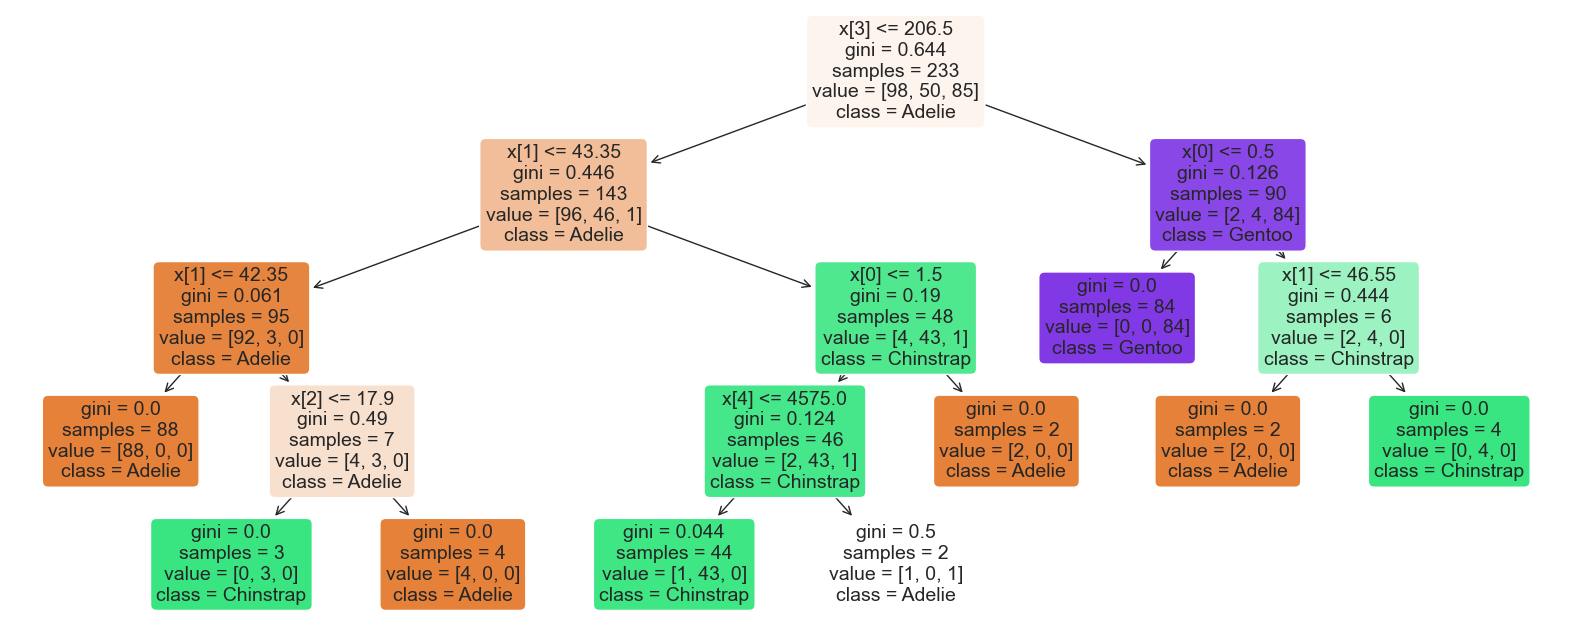

In [6]:
# Draw the Tree

plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   class_names = ["Adelie", "Chinstrap", "Gentoo"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

Accuracy:  0.98
Classification report: 
               precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        48
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100

Confusion matrix:
 [[47  1  0]
 [ 1 17  0]
 [ 0  0 34]]


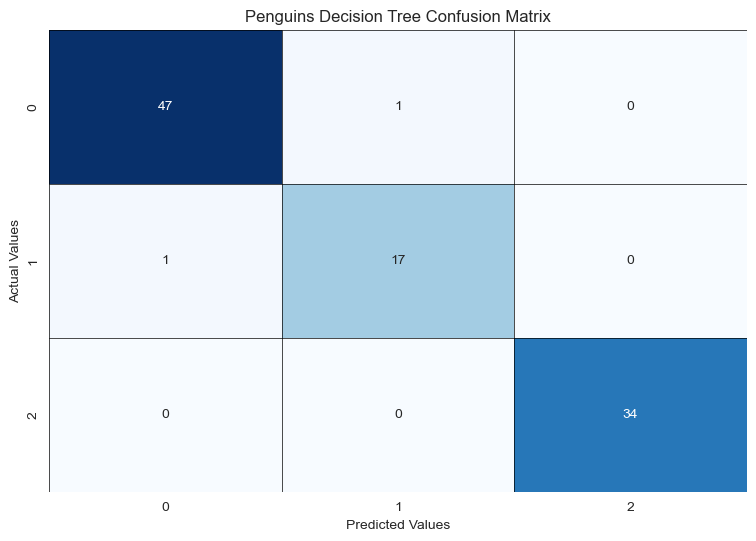

In [7]:
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

clf_rep = classification_report(y_test, y_pred)
print("Classification report: \n", clf_rep)

cf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cf_mat)

draw_confusion_matrix(cf_mat, "Penguins Decision Tree Confusion Matrix")


In [8]:
# Grid-search for finding optimal hyperparameter
max_depth_range = np.array(range(1, 20))

param_grid = {'max_depth': max_depth_range, 'min_samples_leaf': [1, 2, 5, 10, 20], 'min_samples_split': [2, 4, 6, 8, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_params = grid_search.best_params_
print(f"Best max_depth: {best_max_depth}")
print(f"Best Params: {best_params}")
print(f"Best Accuracy: {grid_search.best_score_}")

Best max_depth: 4
Best Params: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9615171137835338
